In [1]:
import sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler

#620150009
#Daunte Robertson

df = pd.read_csv('train.csv')

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,PatientId
0,62,M,ATA,131,0,0,Normal,130,N,0.1,Up,0,474
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1,370
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0,205
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up,0,544
4,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1,302


In [3]:
df['HeartDisease'].value_counts()

HeartDisease
1    389
0    299
Name: count, dtype: int64

<BarContainer object of 2 artists>

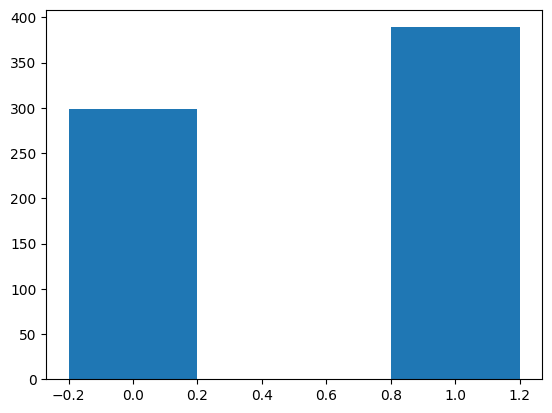

In [4]:
vals_dict  = df['HeartDisease'].value_counts().to_dict()
import matplotlib.pyplot as plt
plt.bar(list(vals_dict.keys()), list(vals_dict.values()),
        width = 0.4)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,PatientId
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,53.380814,132.904070,200.460756,0.238372,136.594477,0.901017,0.565407,451.779070
std,9.400690,18.025038,110.493566,0.426398,25.679580,1.061356,0.496064,260.959924
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,119.000000,0.000000,0.000000,230.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,446.500000
75%,60.000000,140.000000,267.250000,0.000000,155.000000,1.500000,1.000000,681.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,4.400000,1.000000,916.000000


<Axes: >

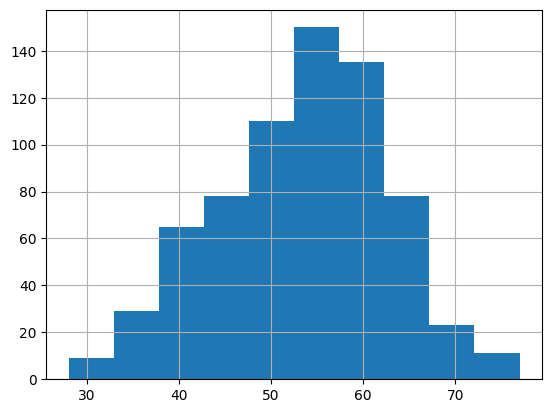

In [6]:
df['Age'].hist()

<Axes: >

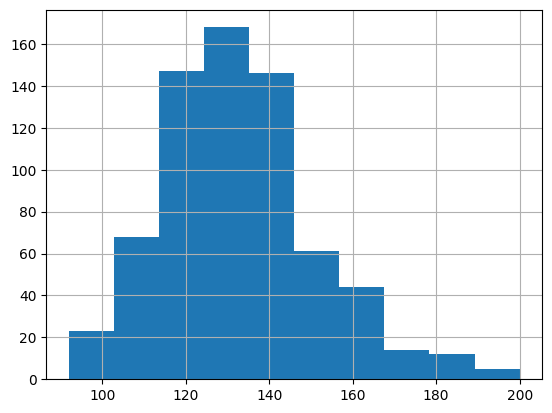

In [7]:
df['RestingBP'].hist()

<Axes: >

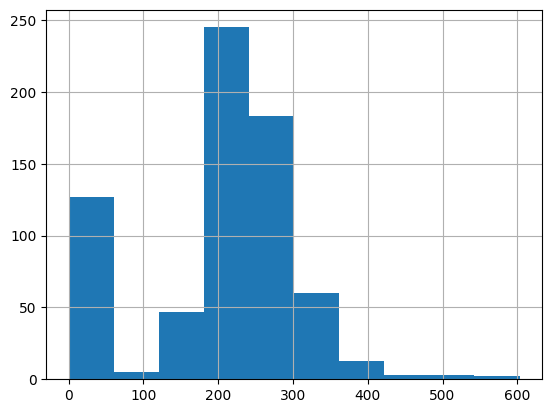

In [8]:
df['Cholesterol'].hist()

<Axes: >

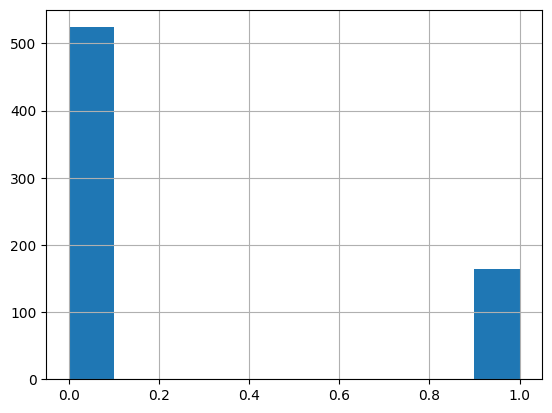

In [9]:
df['FastingBS'].hist()

<Axes: >

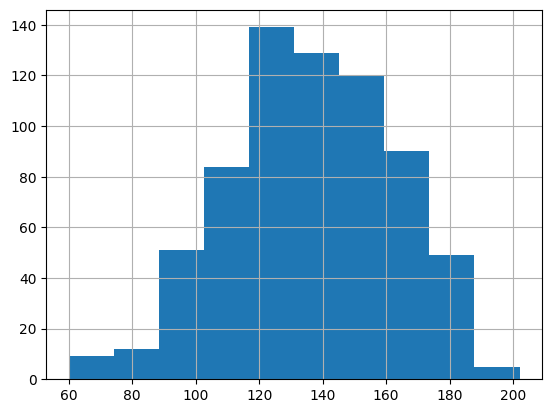

In [10]:
df['MaxHR'].hist()

<Axes: >

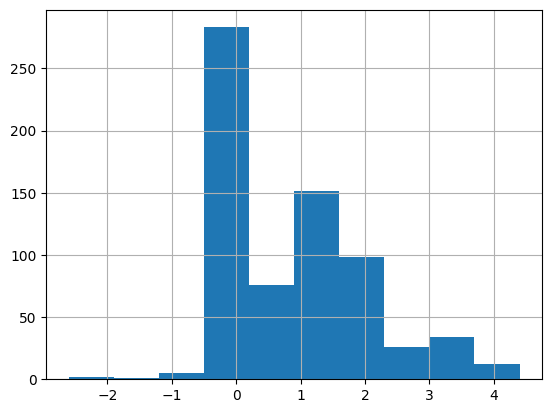

In [11]:
df['Oldpeak'].hist()

<Axes: >

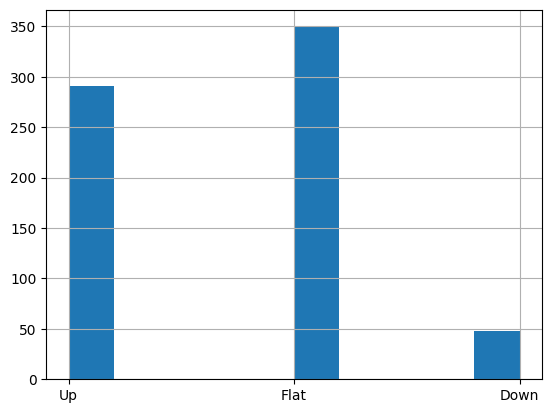

In [12]:
df['ST_Slope'].hist()

In [13]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
PatientId         0
dtype: int64

In [14]:
df.isnull().values.any()

False

In [15]:
len(df)

688

In [16]:
one_hot_encoded = pd.get_dummies(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]) 

In [17]:
one_hot_encoded = one_hot_encoded.astype(int)
print(one_hot_encoded)

     Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0        0      1                  0                  1                  0   
1        0      1                  1                  0                  0   
2        0      1                  1                  0                  0   
3        1      0                  0                  1                  0   
4        0      1                  1                  0                  0   
..     ...    ...                ...                ...                ...   
683      0      1                  1                  0                  0   
684      0      1                  1                  0                  0   
685      0      1                  1                  0                  0   
686      0      1                  1                  0                  0   
687      1      0                  1                  0                  0   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  Resti

In [18]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,M,ATA,131,0,0,Normal,130,N,0.1,...,0,0,0,1,0,1,0,0,0,1
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,...,0,0,0,1,0,0,1,0,0,1
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,...,0,0,0,1,0,0,1,0,0,1
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,...,0,0,0,1,0,0,1,0,0,1
4,53,M,ASY,125,0,1,Normal,120,N,1.5,...,0,0,0,1,0,1,0,0,0,1


In [20]:
df = df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'PatientId'])
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,131,0,0,130,0.1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,60,135,0,0,63,0.5,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,50,150,215,0,140,0.0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,61,140,298,1,120,0.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,53,125,0,1,120,1.5,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,51,131,152,1,130,1.0,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
684,52,125,212,0,168,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
685,41,104,0,0,111,0.0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,1
686,56,140,0,1,121,1.8,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [21]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]  # Remove rows with outliers

In [22]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,131,0,0,130,0.1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,60,135,0,0,63,0.5,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,50,150,215,0,140,0.0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,61,140,298,1,120,0.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,53,125,0,1,120,1.5,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,51,131,152,1,130,1.0,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
684,52,125,212,0,168,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
685,41,104,0,0,111,0.0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,1
686,56,140,0,1,121,1.8,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [23]:
df['Age'] = pd.cut(df['Age'], bins=5, labels=False)

C:\Users\DTTD2\AppData\Local\Temp\ipykernel_27168\2563075452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.cut(df['Age'], bins=5, labels=False)


In [24]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,3,131,0,0,130,0.1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,3,135,0,0,63,0.5,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,2,150,215,0,140,0.0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,3,140,298,1,120,0.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,2,125,0,1,120,1.5,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2,131,152,1,130,1.0,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
684,2,125,212,0,168,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
685,1,104,0,0,111,0.0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,1
686,2,140,0,1,121,1.8,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [25]:
y = df['HeartDisease']
df = df.drop(columns=['HeartDisease'])

In [26]:
y

0      0
1      1
2      0
3      0
4      1
      ..
683    1
684    1
685    0
686    1
687    1
Name: HeartDisease, Length: 603, dtype: int64

In [27]:
X = df.values
X

array([[  3., 131.,   0., ...,   0.,   0.,   1.],
       [  3., 135.,   0., ...,   0.,   0.,   1.],
       [  2., 150., 215., ...,   0.,   0.,   1.],
       ...,
       [  1., 104.,   0., ...,   0.,   0.,   1.],
       [  2., 140.,   0., ...,   0.,   0.,   1.],
       [  0., 100., 246., ...,   0.,   1.,   0.]])

In [28]:
X.shape

(603, 20)

In [29]:
y=y.values
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(482, 20)

In [31]:
X_test.shape

(121, 20)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train

array([[-0.06949628, -0.74926715, -1.86662839, ...,  0.        ,
        -1.08673616,  1.08673616],
       [ 0.97729145, -0.74926715, -1.86662839, ...,  0.        ,
        -1.08673616,  1.08673616],
       [ 0.97729145, -1.04340852, -1.86662839, ...,  0.        ,
         0.92018655, -0.92018655],
       ...,
       [ 0.97729145, -1.92583261,  0.11569644, ...,  0.        ,
        -1.08673616,  1.08673616],
       [ 2.02407918,  0.72143967, -1.86662839, ...,  0.        ,
        -1.08673616,  1.08673616],
       [-1.11628401,  1.60386376,  0.84161821, ...,  0.        ,
         0.92018655, -0.92018655]])

In [33]:
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
accuracy

0.8842975206611571

In [37]:
precision

0.8871366728509587

In [38]:
recall

0.8842975206611571

In [39]:
f1

0.8834752204317422

In [40]:
conf_matrix

array([[45, 10],
       [ 4, 62]], dtype=int64)

In [41]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = model2.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [43]:
accuracy

0.8099173553719008

In [44]:
precision

0.8097140559827127

In [45]:
recall

0.8099173553719008

In [46]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model3.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
accuracy

0.9008264462809917

In [49]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,PatientId
0,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,688
1,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,297
2,60,F,TA,150,240,0,Normal,171,N,0.9,Up,678
3,51,F,NAP,140,308,0,LVH,142,N,1.5,Up,859
4,61,M,TA,134,234,0,Normal,145,N,2.6,Flat,628


In [50]:
test_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
PatientId         0
dtype: int64

In [51]:
one_hot_encoded = pd.get_dummies(test_df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]) 
one_hot_encoded = one_hot_encoded.astype(int)
print(one_hot_encoded)

     Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0        1      0                  0                  0                  1   
1        0      1                  1                  0                  0   
2        1      0                  0                  0                  0   
3        1      0                  0                  0                  1   
4        0      1                  0                  0                  0   
..     ...    ...                ...                ...                ...   
225      0      1                  1                  0                  0   
226      0      1                  1                  0                  0   
227      1      0                  1                  0                  0   
228      0      1                  1                  0                  0   
229      0      1                  0                  0                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  Resti

In [52]:
test_df = pd.concat([test_df, one_hot_encoded], axis=1)
test_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,76,F,NAP,140,197,0,ST,116,N,1.1,...,1,0,0,0,1,1,0,0,1,0
1,57,M,ASY,110,0,1,ST,131,Y,1.4,...,0,0,0,0,1,0,1,0,0,1
2,60,F,TA,150,240,0,Normal,171,N,0.9,...,0,1,0,1,0,1,0,0,0,1
3,51,F,NAP,140,308,0,LVH,142,N,1.5,...,1,0,1,0,0,1,0,0,0,1
4,61,M,TA,134,234,0,Normal,145,N,2.6,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,57,M,ASY,152,274,0,Normal,88,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
226,70,M,ASY,140,0,1,Normal,157,Y,2.0,...,0,0,0,1,0,0,1,0,1,0
227,45,F,ASY,132,297,0,Normal,144,N,0.0,...,0,0,0,1,0,1,0,0,0,1
228,50,M,ASY,115,0,0,Normal,120,Y,0.5,...,0,0,0,1,0,0,1,0,1,0


In [53]:
patient_ids = test_df['PatientId']
test_df = test_df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'PatientId'])
test_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,76,140,197,0,116,1.1,1,0,0,0,1,0,0,0,1,1,0,0,1,0
1,57,110,0,1,131,1.4,0,1,1,0,0,0,0,0,1,0,1,0,0,1
2,60,150,240,0,171,0.9,1,0,0,0,0,1,0,1,0,1,0,0,0,1
3,51,140,308,0,142,1.5,1,0,0,0,1,0,1,0,0,1,0,0,0,1
4,61,134,234,0,145,2.6,0,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,57,152,274,0,88,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
226,70,140,0,1,157,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
227,45,132,297,0,144,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0,1
228,50,115,0,0,120,0.5,0,1,1,0,0,0,0,1,0,0,1,0,1,0


In [54]:
Test_X = test_df.values
Test_X

array([[ 76., 140., 197., ...,   0.,   1.,   0.],
       [ 57., 110.,   0., ...,   0.,   0.,   1.],
       [ 60., 150., 240., ...,   0.,   0.,   1.],
       ...,
       [ 45., 132., 297., ...,   0.,   0.,   1.],
       [ 50., 115.,   0., ...,   0.,   1.,   0.],
       [ 47., 130., 253., ...,   0.,   0.,   1.]])

In [55]:
Test_X.shape

(230, 20)

In [56]:
Test_X = sc.transform(Test_X)
y_pred_test = model.predict(Test_X)
y_pred_test2 = model2.predict(Test_X)
y_pred_test3 = model3.predict(Test_X)

In [57]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
y_pred_test2

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [59]:
y_pred_test3

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [60]:
df_submission = pd.DataFrame({'PatientId': patient_ids, 'HeartDisease': y_pred_test})
df_submission2 = pd.DataFrame({'PatientId': patient_ids, 'HeartDisease': y_pred_test2})
df_submission3 = pd.DataFrame({'PatientId': patient_ids, 'HeartDisease': y_pred_test3})

In [61]:
df_submission

,PatientId,HeartDisease
0,688,1
1,297,1
2,678,1
3,859,1
4,628,1
...,...,...
225,737,1
226,378,1
227,66,1
228,381,1


In [62]:
df_submission2

,PatientId,HeartDisease
0,688,0
1,297,1
2,678,0
3,859,1
4,628,1
...,...,...
225,737,1
226,378,1
227,66,0
228,381,1


In [63]:
df_submission3

,PatientId,HeartDisease
0,688,1
1,297,1
2,678,0
3,859,0
4,628,1
...,...,...
225,737,1
226,378,1
227,66,0
228,381,1


In [64]:
df_submission.to_csv('submission.csv', index=False)
df_submission2.to_csv('submission2.csv', index=False)
df_submission3.to_csv('submission3.csv', index=False)